# Introduction to Logistic Regression

Welcome to this introduction to Logistic Regression!

## Overview

brief overview.
binary classification.

## Key Concepts

- **Logistic Function:** Understand the core of Logistic Regression with the logistic function, which maps raw scores to probabilities.
- **Decision Boundary:** Learn about the decision boundary and how it separates different classes.
- **Training Process:** Get insights into how Logistic Regression is trained using optimization techniques.


In [4]:
import numpy as np

def sigmoid(z):
    """
    Compute the logistic function for a given input.

    Parameters:
    - z (float or numpy.ndarray): The input value or array.

    Returns:
    - float or numpy.ndarray: The result of applying the logistic function to the input.
    """
    sigmoid = 1 / (1 + np.exp(-z))
    assert np.all((sigmoid >= 0) & (sigmoid <= 1))
    return sigmoid


# Calculating loss function, using cross entropy

$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

In [2]:
# Example of a loss calculation with incorrect labels leading to high loss.

w1_test, w2_test, bias_test = 5, 3, 2

x = np.array([.3, .4, 1])
y = 0

# Calculate the linear combination of features and weights.
z = np.dot([w1_test, w2_test, bias_test], x.T)
print('z is:', z)

# Apply the logistic function to obtain predicted probabilities.
a = sigmoid(z)
print('a is:', a)

# Compute the logistic regression cost function.
loss = - (y * np.log(a) + (1 - y) * np.log(1 - a) )

print('loss is:', loss)

z is: 4.7
a is: 0.990986701347152
loss is: 4.709054164169874


In [3]:
# Example of a loss calculation with correct labels leading to high loss.

w1_test, w2_test, bias_test = 5, 3, 2

x = np.array([.3, .4, 1])
y = 1

# Calculate the linear combination of features and weights.
z = np.dot([w1_test, w2_test, bias_test], x.T)
print('z is:', z)

# Apply the logistic function to obtain predicted probabilities.
a = sigmoid(z)
print('a is:', a)

# Compute the logistic regression cost function.
loss = - (y * np.log(a) + (1 - y) * np.log(1 - a) )

print('loss is:', loss)

z is: 4.7
a is: 0.990986701347152
loss is: 0.009054164169887607


# Cost function  

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [4]:
# Assign test weights and bias
w1_test, w2_test, bias_test = 5, 3, 2

# Test data and labels
data_tst = [[.3,.5,1],[.5,.3,1],[.1,.2,1],[.2,.1,1],[.4,.5,1]]
y = [1,0,1,0,0]

losses = []
# Number of data points
m = len(data_tst)

# Loop through data points
for count, value in enumerate(data_tst):
    # Calculate the linear combination
    z = np.dot([w1_test, w2_test, bias_test], np.array(value).T)
    
    # Apply sigmoid activation function
    a = sigmoid(z)
    
    # Calculate loss
    loss = - (y[count] * np.log(a) + (1 - y[count]) * np.log(1 - a))
    losses.append(loss)
    
# Average the total loss
print(losses)
print('Cost:', np.sum(losses)/m)

[0.006715348489117944, 5.404506411799257, 0.044063967938573874, 3.3362192588706603, 5.5040784432705925]
Cost: 2.859116686073641


## Generate data

In [5]:
# True coefficients for a linear model.
true_coefs = np.array([[4], [-2]])
bias = -1

# Number of training data points.
num_data_points = 5000

# assign to each point 2 feature number from uniform random variable
feature_matrix = np.random.rand(num_data_points, true_coefs.shape[0])

# Displaying the first five rows of the feature matrix.
print('Random feature space is a 2D space:\n', feature_matrix[:5])

Random feature space is a 2D space:
 [[0.55015621 0.93898251]
 [0.78661136 0.79044948]
 [0.34599779 0.06512599]
 [0.75665027 0.16161377]
 [0.39373444 0.3722592 ]]


In [6]:
z_true = np.dot(feature_matrix, true_coefs) + bias

# Calculate probabilities using the logistic function.
pro_true = sigmoid(z_true)
print('Generated binary labels:\n', pro_true[:5])

binary_labels = np.random.binomial(1, pro_true.flatten())

# Display the first five generated binary labels.
print('Generated binary labels:\n', binary_labels[:50])

Generated binary labels:
 [[0.3368552 ]
 [0.63773492]
 [0.56309662]
 [0.84597482]
 [0.45770614]]
Generated binary labels:
 [0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 1]


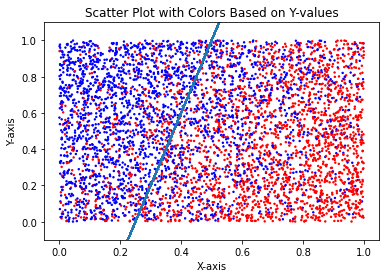

In [7]:
import matplotlib.pyplot as plt

colors = ['blue' if label == 0 else 'red' for label in binary_labels]
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=2)

plt.plot(feature_matrix[:, 0] , true_coefs[0]* feature_matrix[:, 0] + bias )

plt.ylim(-.1,1.1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.show()

# Optimization using Gradient Descent 
(without vectorization)

In [8]:
j, dw1, dw2, db = 0, 0, 0, 0

m = num_data_points
y = binary_labels

l_rate = 0.02

w1, w2, b = np.random.rand(3)
print(w1, w2, b)

cost = []

for j in range(10000):
    i = 0
    for x in feature_matrix:
        x = np.concatenate((x,np.array([1])))
        z = np.dot([w1, w2, b], x)
        a = sigmoid(z)

        j += - (y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))

        dz = a - y[i]

        dw1 += x[0] * dz
        dw2 += x[1] * dz
        db +=  dz
        i += 1
    cost.append(np.sum(j)/m)
    dw1 = dw1/m
    dw2 = dw2/m
    db = db/m

    w1 = w1 - l_rate * dw1
    w2 = w2 - l_rate * dw2
    b = b - l_rate * db

0.7401599315573322 0.7661995737913825 0.4488629059578271


In [9]:
print('true parameters', true_coefs,bias )
print('optimized parameters', w1, w2, b)

true parameters [[ 4]
 [-2]] -1
optimized parameters 3.691778776923586 -1.964121128945492 -0.8980772603687536


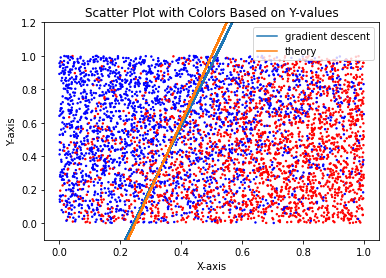

In [21]:
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=2)

plt.plot(feature_matrix[:, 0] , w1* feature_matrix[:, 0] + b , label = 'gradient descent' )

plt.plot(feature_matrix[:, 0] , true_coefs[0]* feature_matrix[:, 0] + bias , label = 'theory' )

plt.ylim(-.1,1.2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.legend()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, binary_labels, test_size=0.25, random_state=16)

C:\Users\16462\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

logreg.coef_

array([[ 3.79368946, -1.77532074]])

In [18]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[473, 176],
       [142, 459]], dtype=int64)

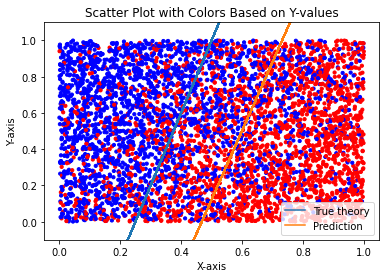

In [19]:
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=10)

plt.plot(feature_matrix[:, 0] , true_coefs[0]* feature_matrix[:, 0] + bias , label = 'True theory' )

plt.plot(feature_matrix[:, 0] ,logreg.coef_[0][0]* feature_matrix[:, 0] +logreg.coef_[0][1], label = 'Prediction' )

plt.ylim(-.1,1.1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.legend()
plt.show()

## learning algorithm using gradient descent- Vectorized


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [20]:
Y = binary_labels
X = feature_matrix
X

array([[0.55015621, 0.93898251],
       [0.78661136, 0.79044948],
       [0.34599779, 0.06512599],
       ...,
       [0.39287552, 0.05338159],
       [0.32653747, 0.69252664],
       [0.30540167, 0.31387709]])

In [21]:
X = np.array([np.concatenate((i,np.array([1]))) for i in X])

In [22]:
X

array([[0.55015621, 0.93898251, 1.        ],
       [0.78661136, 0.79044948, 1.        ],
       [0.34599779, 0.06512599, 1.        ],
       ...,
       [0.39287552, 0.05338159, 1.        ],
       [0.32653747, 0.69252664, 1.        ],
       [0.30540167, 0.31387709, 1.        ]])

In [23]:
w = np.zeros((1,X.shape[1]))
w

array([[0., 0., 0.]])

In [24]:
# Initialize an empty list to store the cost values during each iteration.
costs = []

# Number of iterations.
itr = 100000

# Iterate over the specified number of iterations.
for i in range(itr):
    # Set the learning rate.
    learning_rate = 0.01
    
    # Number of training examples.
    m = X.shape[0]
    
    # Calculate the linear combination of features and weights.
    z = np.dot(w, X.T)
    
    # Apply the logistic function to obtain predicted probabilities.
    y_hat = sigmoid(z)
    
    # Compute the logistic regression cost function.
    cost = np.sum(((-np.log(y_hat[0])) * Y + (-np.log(1 - y_hat[0])) * (1 - Y))) / m
    
    # Compute the gradient of the cost function with respect to the weights.
    dw = -(np.dot(Y - y_hat[0], X)) / m

    # Update the weights using gradient descent.
    w = w - (learning_rate * dw)

    # Append the current cost to the list for later analysis.
    costs.append(cost)

# Display the final learned weights after the iterations.
print("Final learned weights (w):", w)


Final learned weights (w): [[ 3.96002967 -1.87284442 -1.07015081]]


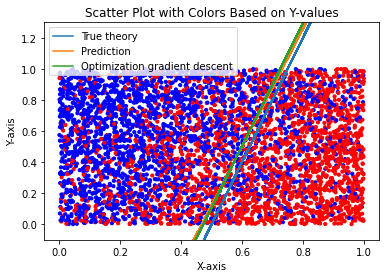

In [26]:
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=10)

plt.plot(feature_matrix[:, 0] ,true_coefs[0]* feature_matrix[:, 0] +true_coefs[1] , label = 'True theory' )

plt.plot(feature_matrix[:, 0] ,logreg.coef_[0][0]* feature_matrix[:, 0] +logreg.coef_[0][1], label = 'Prediction' )

plt.plot(feature_matrix[:, 0] , w[0][0]* feature_matrix[:, 0] + w[0][1], label = 'Optimization gradient descent' )

plt.ylim(-.1,1.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.legend()
plt.show()